In [8]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as plt
%matplotlib inline
import torchvision.utils as vutils
import glob
import tensorflow as tf
import matplotlib.gridspec as gridspec
from torchvision import datasets, transforms

In [2]:
import sys
sys.path.append('../')
from data import get_loaders

In [3]:
%load_ext autoreload
%autoreload 1

In [114]:
def plot_clusters(data, run_name, seed=123):
    fig_name = 'figs_gluster/%s.png' % run_name
    data = torch.load('figs_gluster/%s.pth.tar' % run_name)
    assign_i, target_i, pred_i, loss_i, normC = data['assign'], data['target'], data['pred'], data['loss'], data['normC']
    pad = 2
    nsamples = 20
    np.random.seed(seed)

    train_dataset = datasets.MNIST(
            '../data/mnist', train=True, download=True,
            transform=transforms.Compose([
                transforms.ToTensor()
            ]))

    _, counts = np.unique(assign_i, return_counts=True)

    nclusters = len(counts)
    height = nclusters
    width = nsamples
    plt.figure(figsize=(7 * width, 4 * height))
    plt.tight_layout(pad=1., w_pad=3., h_pad=3.0)
    
    hpad = 28+2*pad
    images = np.zeros((nclusters, nsamples, 3, hpad, hpad))
    print('Train loss: %.4f' % (loss_i.mean()))
    print('Train accuracy: %.2f%%\n' % (((target_i==pred_i)*100.).mean()))
    for i in range(nclusters):
        idx, _ = np.where(assign_i==i)
        print('Cluster %d, size: %d' % (i, len(idx)))
        print('Cluster %d, normC: %.8f' % (i, normC[i]))
        print('Cluster %d, loss: %.4f' % (i, loss_i[idx].mean()))
        print('Cluster %d, accuracy: %.2f%%\n' % (i, ((target_i[idx]==pred_i[idx])*100.).mean()))
        np.random.shuffle(idx)
        for j in range(nsamples):
            xi = train_dataset[idx[j]][0]
            xi2 = np.zeros((3, hpad, hpad))
            xi2[0] = (pred_i[idx[j]]!=target_i[idx[j]])
            xi2[0:1, pad:28+pad, pad:28+pad] = xi
            xi2[1:2, pad:28+pad, pad:28+pad] = xi
            xi2[2:3, pad:28+pad, pad:28+pad] = xi
            images[i, j] = xi2

    xi = vutils.make_grid(torch.tensor(images.reshape(-1, 3, hpad, hpad)), nrow=nsamples, normalize=True, scale_each=True)

    plt.imshow(xi.numpy().transpose([1,2,0]))
    plt.axis('off')
    plt.savefig(fig_name, dpi=100, bbox_inches='tight')

Train loss: 0.0979
Train accuracy: 97.21%

Cluster 0, size: 17564
Cluster 0, normC: 0.00910387
Cluster 0, loss: 0.1716
Cluster 0, accuracy: 95.04%

Cluster 1, size: 42436
Cluster 1, normC: 0.00354341
Cluster 1, loss: 0.0675
Cluster 1, accuracy: 98.11%



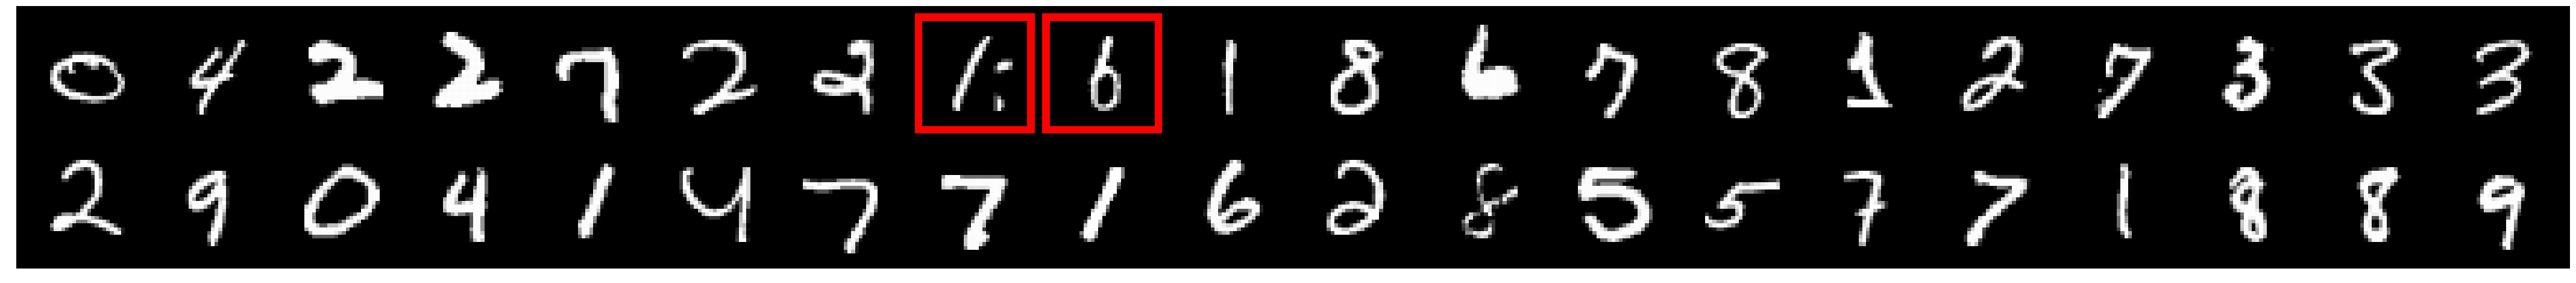

In [118]:
run_name='mlp,nclusters_2,citers_2'
plot_clusters(data, run_name)

Train loss: 0.0979
Train accuracy: 97.21%

Cluster 0, size: 941
Cluster 0, normC: 0.10720705
Cluster 0, loss: 1.5489
Cluster 0, accuracy: 38.58%

Cluster 1, size: 59059
Cluster 1, normC: 0.00135900
Cluster 1, loss: 0.0748
Cluster 1, accuracy: 98.15%



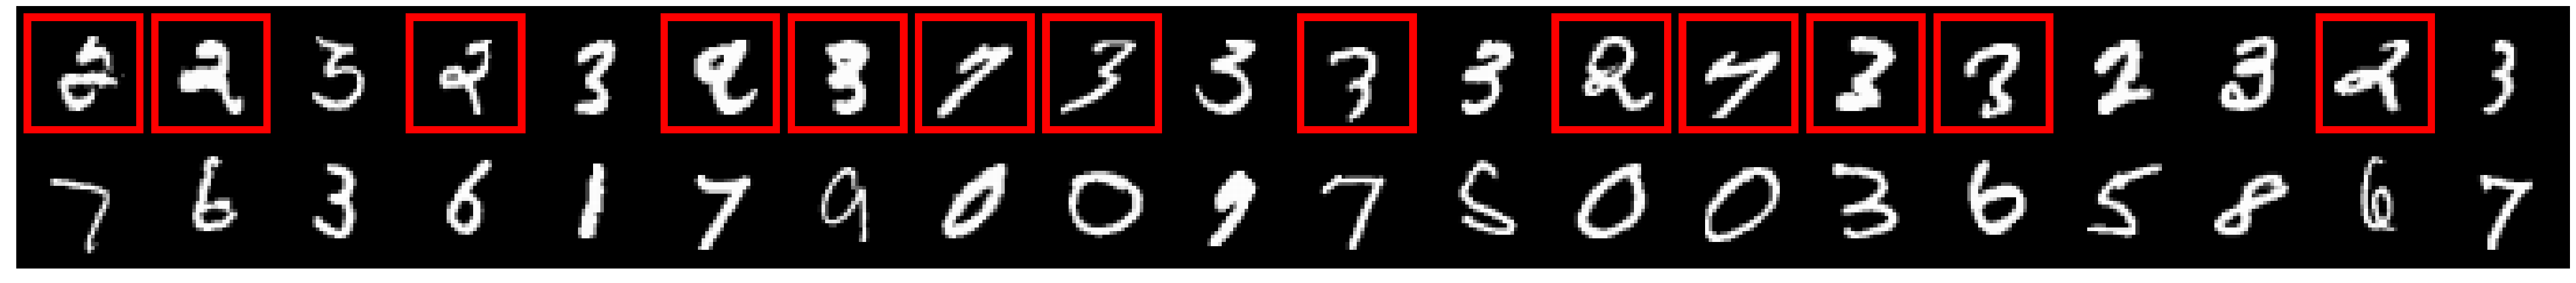

In [119]:
run_name='mlp,nclusters_2,citers_10'
plot_clusters(data, run_name)

Train loss: 0.0979
Train accuracy: 97.21%

Cluster 0, size: 554
Cluster 0, normC: 0.13881443
Cluster 0, loss: 1.4553
Cluster 0, accuracy: 40.07%

Cluster 1, size: 264
Cluster 1, normC: 0.14280315
Cluster 1, loss: 1.3774
Cluster 1, accuracy: 41.29%

Cluster 2, size: 583
Cluster 2, normC: 0.13515103
Cluster 2, loss: 1.3426
Cluster 2, accuracy: 45.80%

Cluster 3, size: 300
Cluster 3, normC: 0.11932945
Cluster 3, loss: 1.4607
Cluster 3, accuracy: 45.00%

Cluster 4, size: 459
Cluster 4, normC: 0.08940046
Cluster 4, loss: 1.3171
Cluster 4, accuracy: 52.51%

Cluster 5, size: 543
Cluster 5, normC: 0.10827202
Cluster 5, loss: 1.2735
Cluster 5, accuracy: 52.49%

Cluster 6, size: 394
Cluster 6, normC: 0.09047596
Cluster 6, loss: 0.8733
Cluster 6, accuracy: 72.59%

Cluster 7, size: 750
Cluster 7, normC: 0.04271078
Cluster 7, loss: 0.4544
Cluster 7, accuracy: 89.60%

Cluster 8, size: 2535
Cluster 8, normC: 0.02237182
Cluster 8, loss: 0.1976
Cluster 8, accuracy: 98.86%

Cluster 9, size: 53618
Cluste

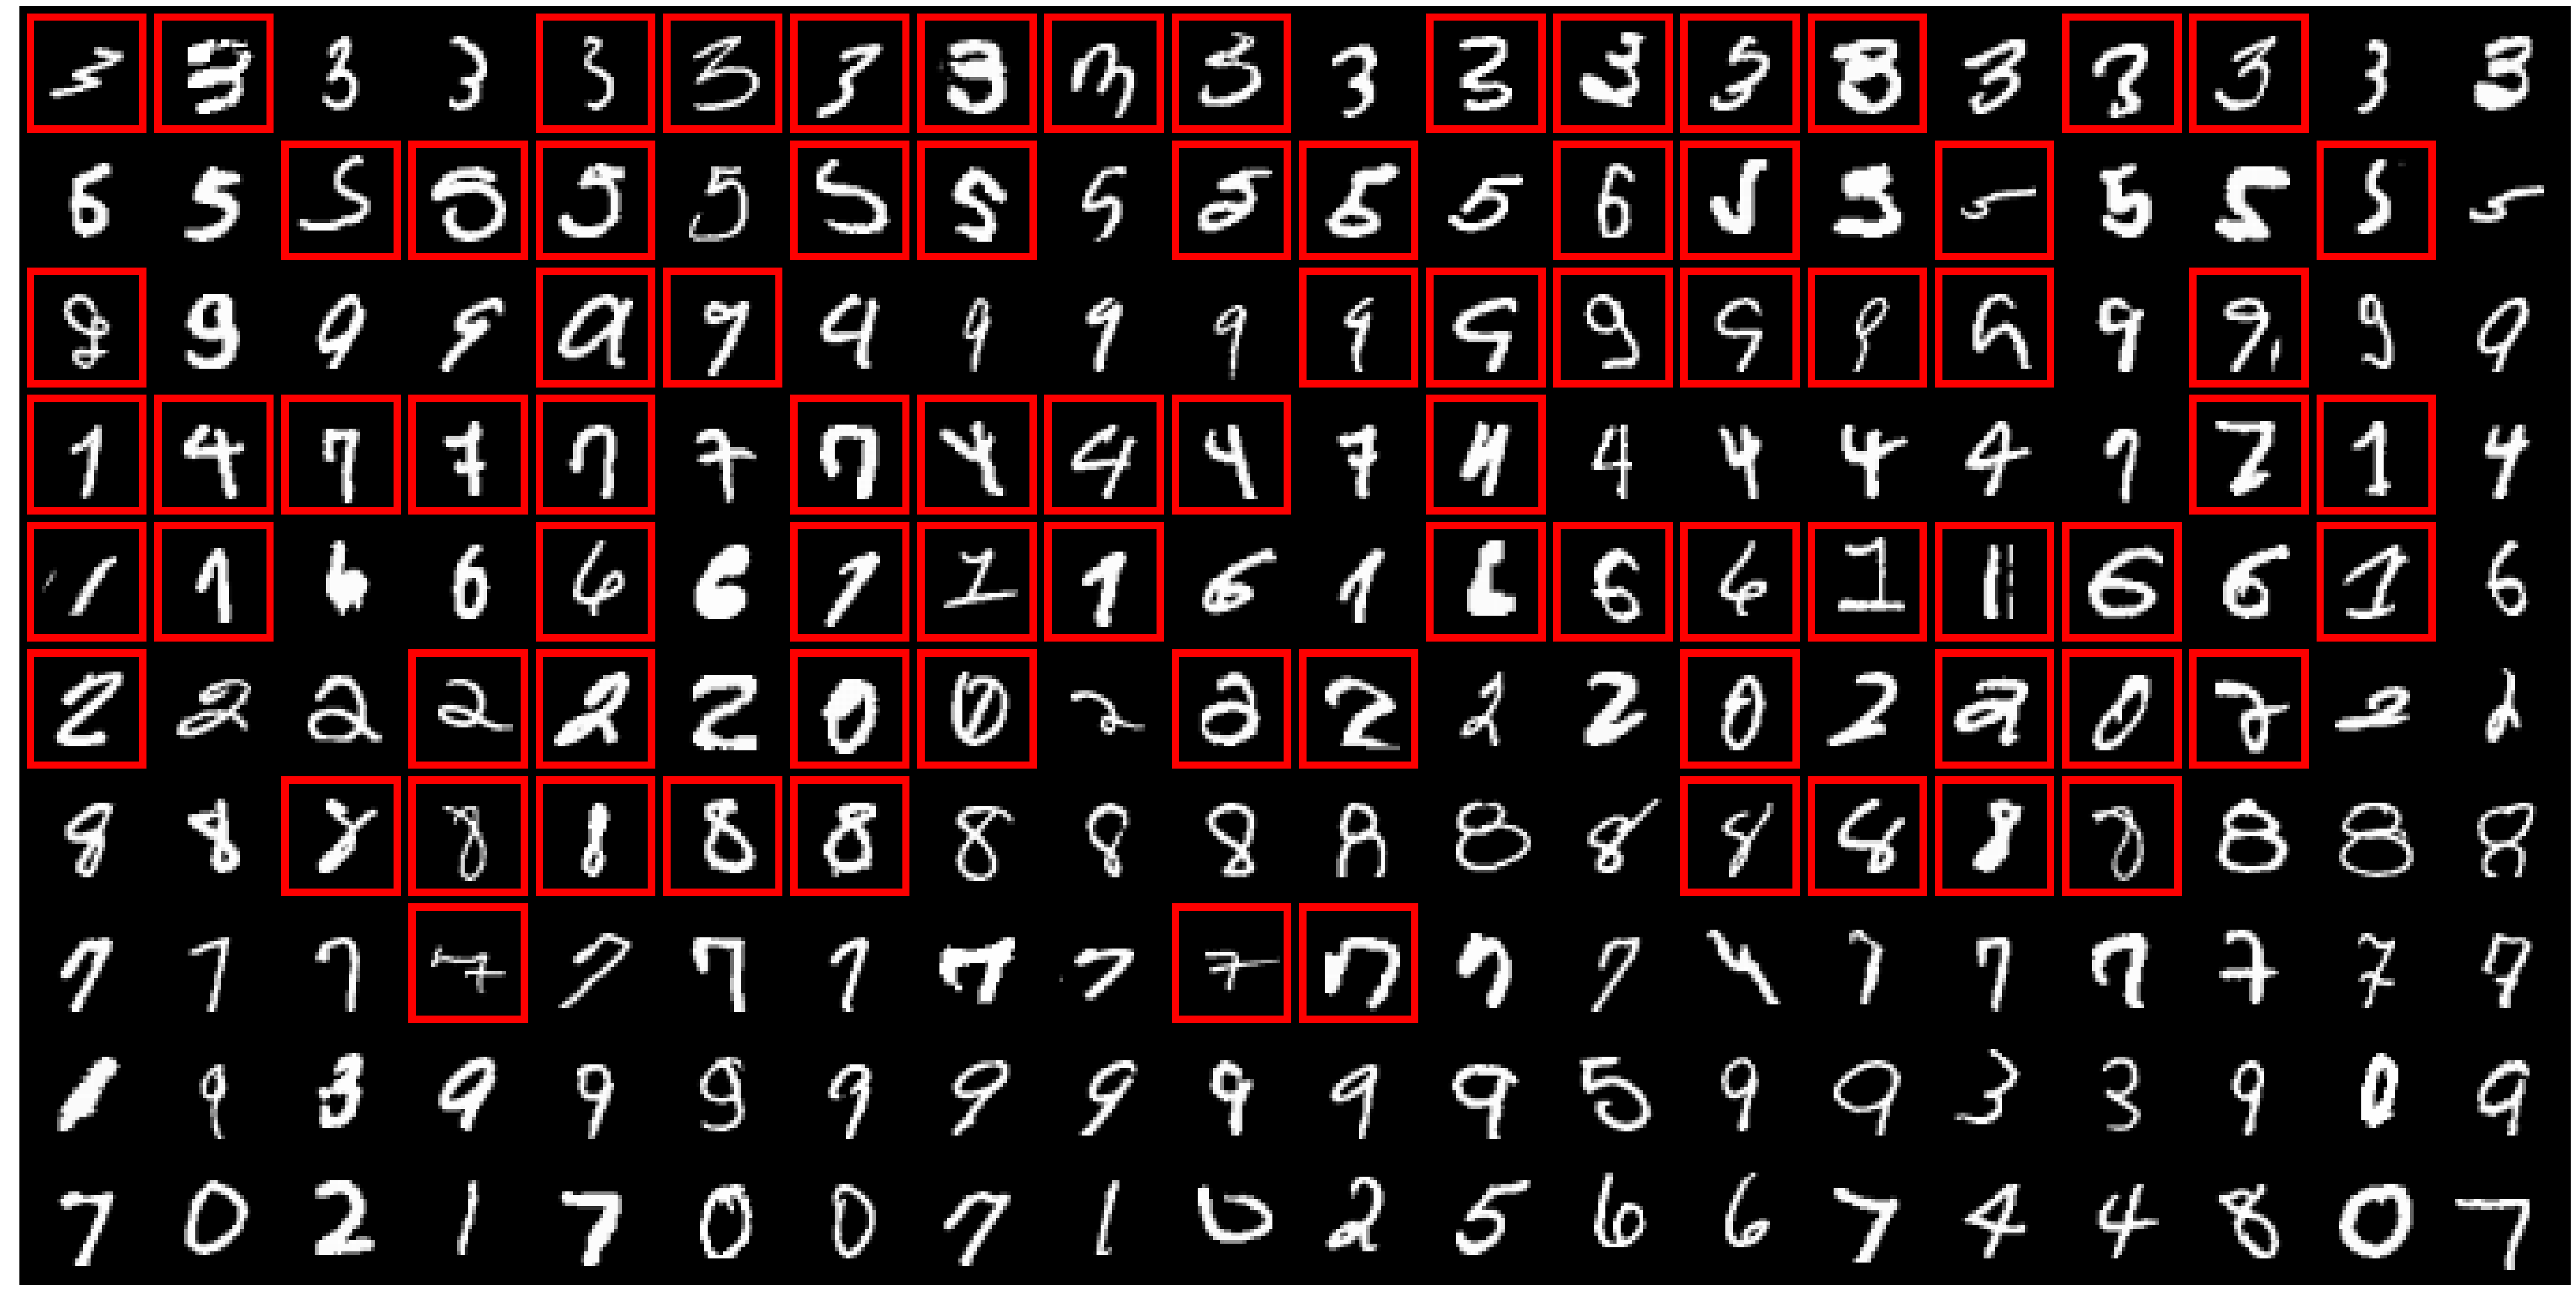

In [122]:
run_name='mlp,nclusters_10,citers_10'
plot_clusters(data, run_name)

* There is a pure cluster with 90% data low normC and ~100%
* Each other cluster found similar errors, e.g. 3 vs 8, 5 vs 6, 9 vs 7, and so on.
* When nclusters=2, the normC for bigger cluster is smaller when citers=10 vs citers=2 but average loss is bigger. why?

# Online

Train loss: 0.1344
Train accuracy: 96.08%

Cluster 0, size: 1898
Cluster 0, normC: 0.04201435
Cluster 0, loss: 0.9080
Cluster 0, accuracy: 69.07%

Cluster 1, size: 951
Cluster 1, normC: 0.06143579
Cluster 1, loss: 1.2449
Cluster 1, accuracy: 58.04%

Cluster 2, size: 205
Cluster 2, normC: 0.10400929
Cluster 2, loss: 2.0054
Cluster 2, accuracy: 38.05%

Cluster 3, size: 173
Cluster 3, normC: 0.13180774
Cluster 3, loss: 1.6816
Cluster 3, accuracy: 37.57%

Cluster 4, size: 388
Cluster 4, normC: 0.06845734
Cluster 4, loss: 1.1069
Cluster 4, accuracy: 63.40%

Cluster 5, size: 497
Cluster 5, normC: 0.02695978
Cluster 5, loss: 0.3754
Cluster 5, accuracy: 91.75%

Cluster 6, size: 487
Cluster 6, normC: 0.11047931
Cluster 6, loss: 1.2823
Cluster 6, accuracy: 53.80%

Cluster 7, size: 643
Cluster 7, normC: 0.12162238
Cluster 7, loss: 1.3117
Cluster 7, accuracy: 47.12%

Cluster 8, size: 561
Cluster 8, normC: 0.13303529
Cluster 8, loss: 1.6288
Cluster 8, accuracy: 37.61%

Cluster 9, size: 54197
Cluste

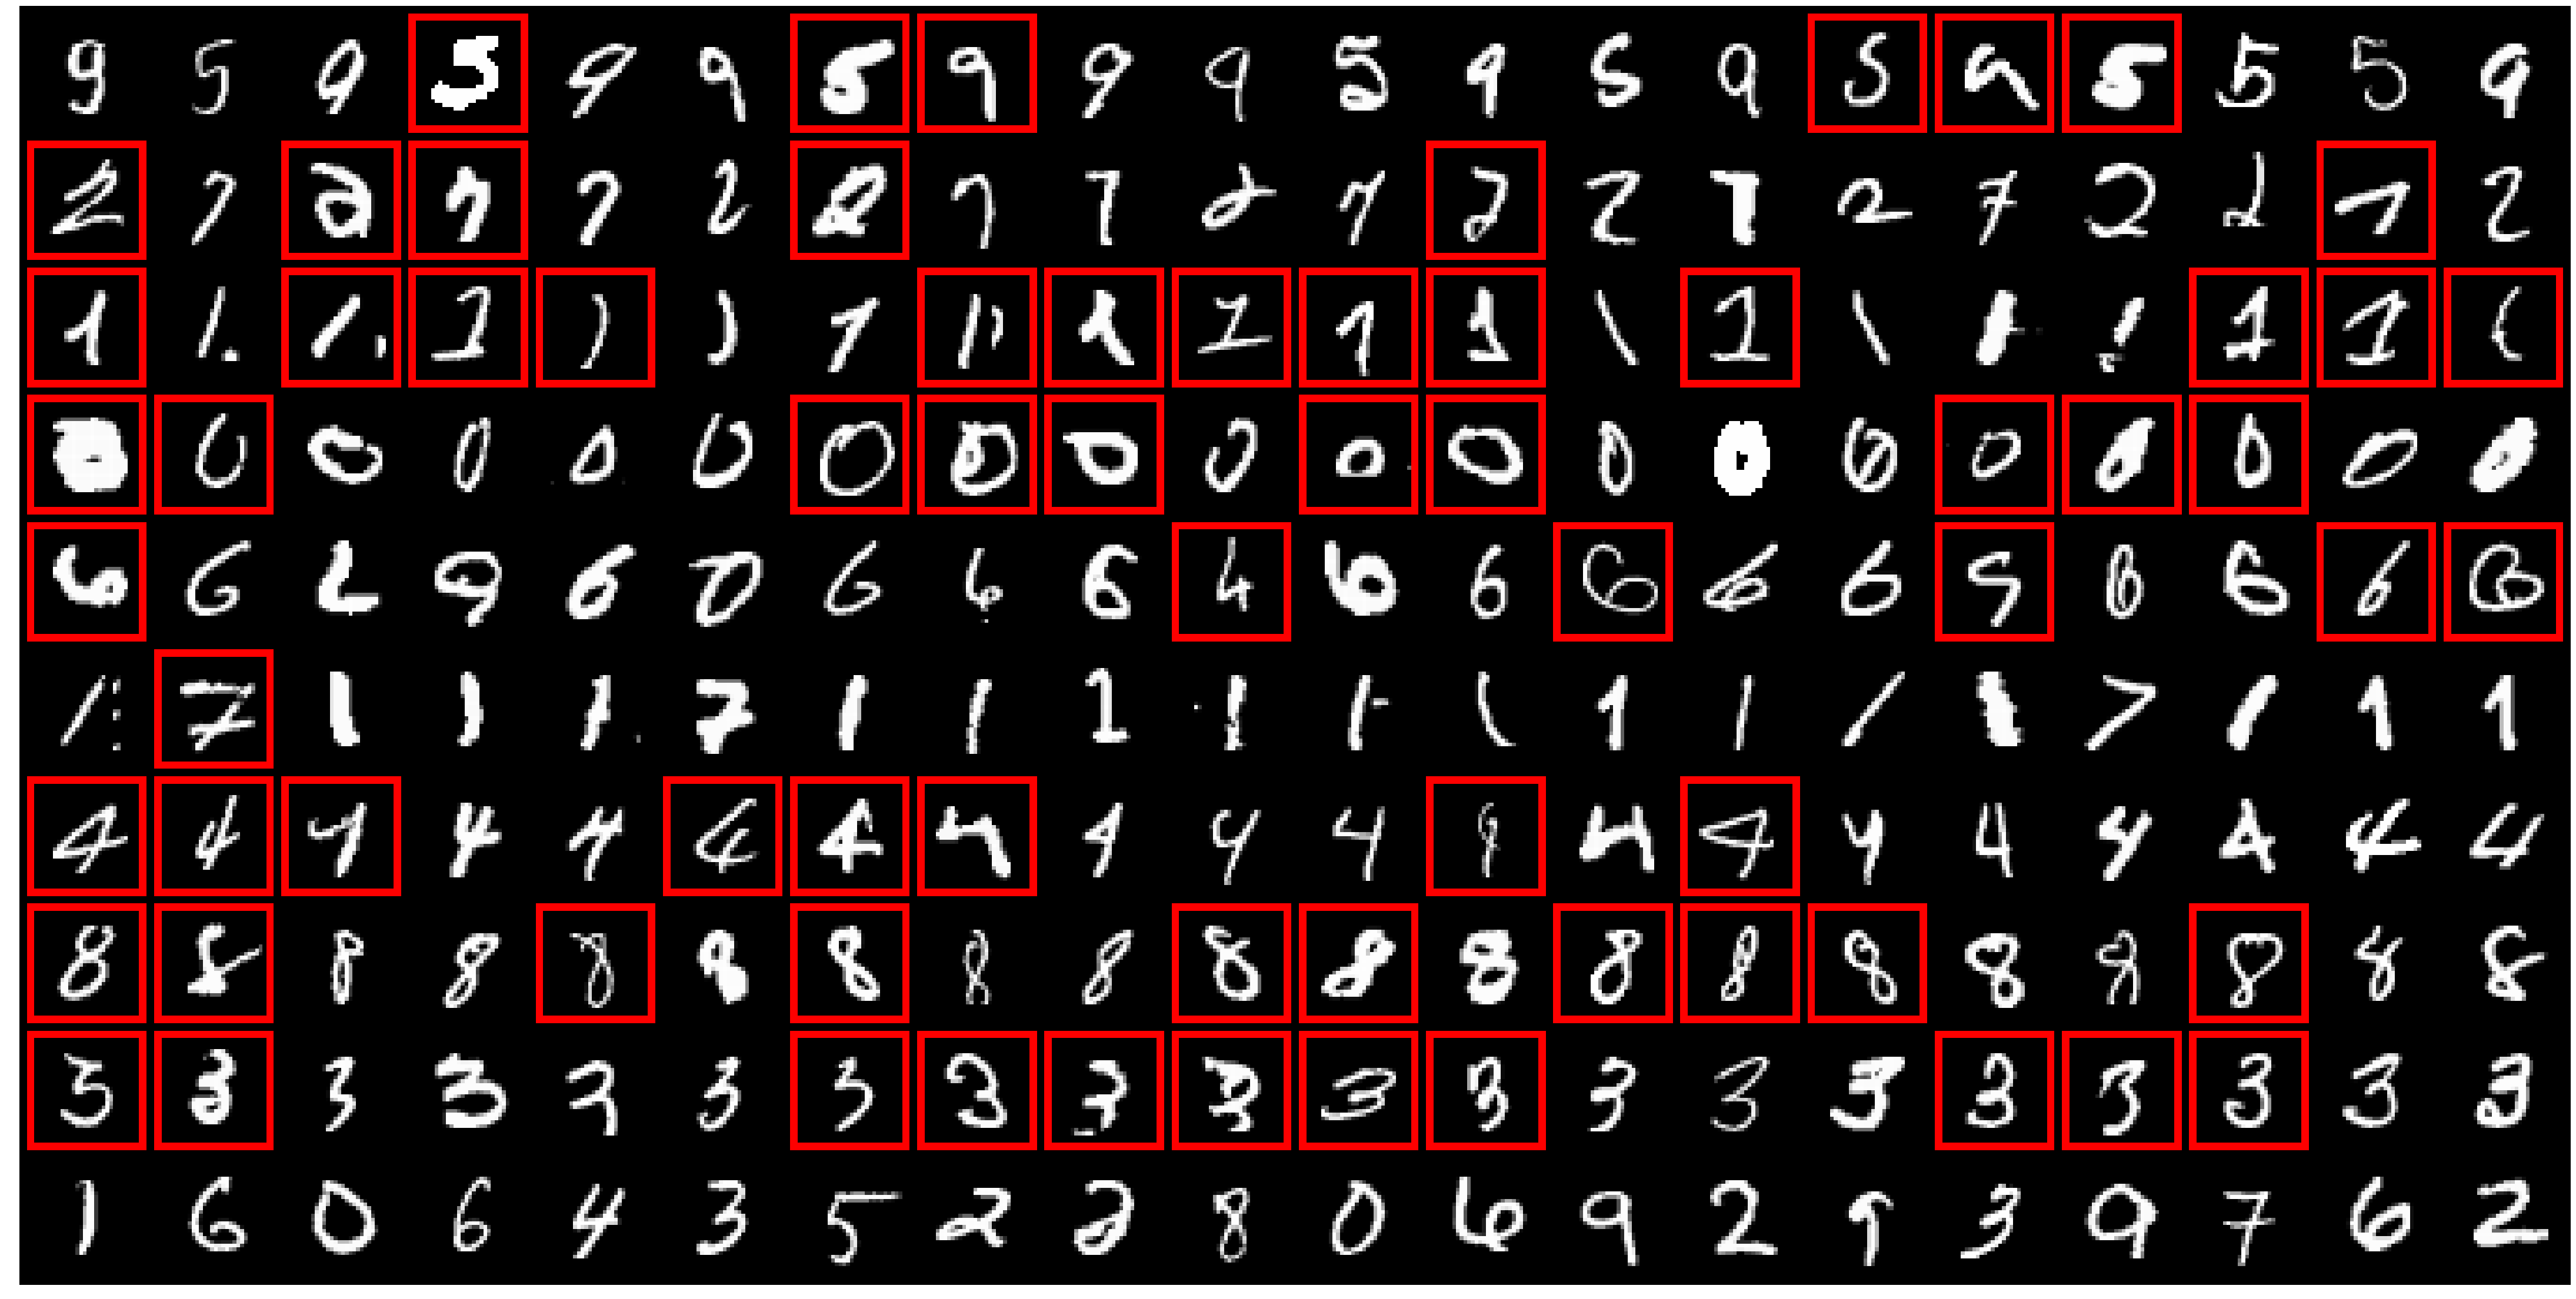

In [127]:
run_name='mlp,nclusters_10,online'
plot_clusters(data, run_name)

# Delayed

Train loss: 0.0981
Train accuracy: 97.19%

Cluster 0, size: 785
Cluster 0, normC: 0.03348618
Cluster 0, loss: 0.6270
Cluster 0, accuracy: 81.27%

Cluster 1, size: 547
Cluster 1, normC: 0.06867860
Cluster 1, loss: 1.1480
Cluster 1, accuracy: 57.77%

Cluster 2, size: 1276
Cluster 2, normC: 0.05578486
Cluster 2, loss: 1.1357
Cluster 2, accuracy: 59.33%

Cluster 3, size: 551
Cluster 3, normC: 0.06434103
Cluster 3, loss: 0.9988
Cluster 3, accuracy: 68.06%

Cluster 4, size: 52896
Cluster 4, normC: 0.00122904
Cluster 4, loss: 0.0167
Cluster 4, accuracy: 99.99%

Cluster 5, size: 185
Cluster 5, normC: 0.13966356
Cluster 5, loss: 1.5908
Cluster 5, accuracy: 34.59%

Cluster 6, size: 728
Cluster 6, normC: 0.09395944
Cluster 6, loss: 1.0374
Cluster 6, accuracy: 61.26%

Cluster 7, size: 2367
Cluster 7, normC: 0.00810096
Cluster 7, loss: 0.1183
Cluster 7, accuracy: 99.58%

Cluster 8, size: 235
Cluster 8, normC: 0.06433026
Cluster 8, loss: 0.8347
Cluster 8, accuracy: 69.79%

Cluster 9, size: 430
Clust

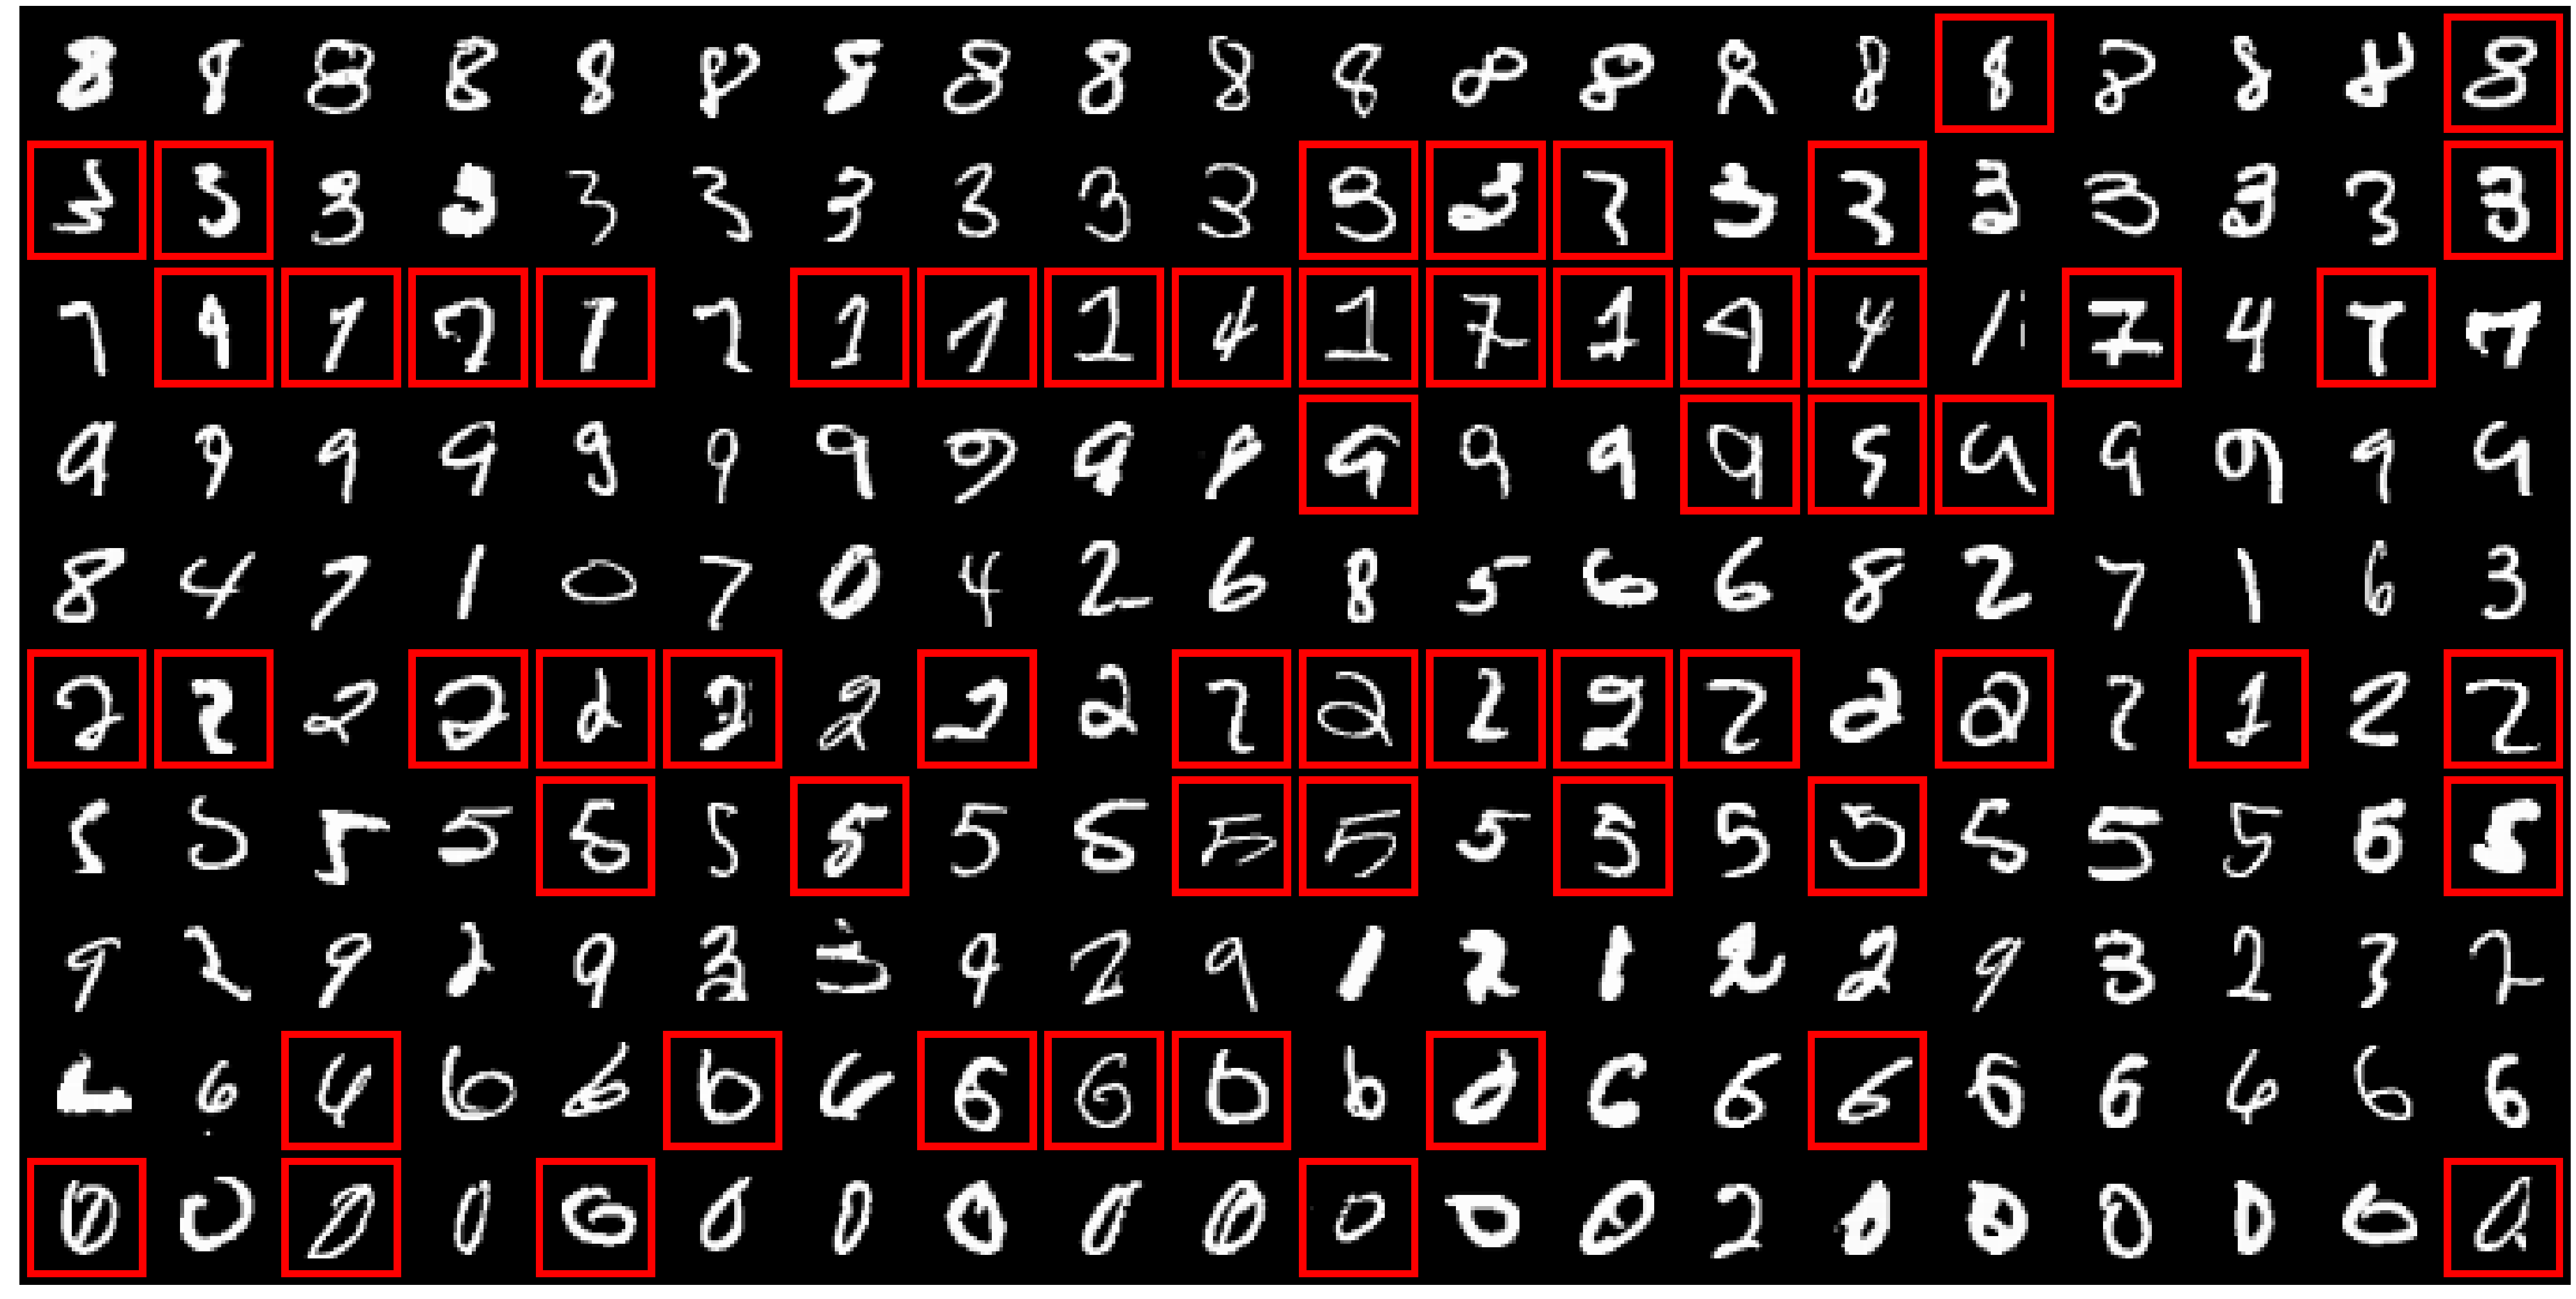

In [128]:
run_name='mlp,nclusters_10,online,delay_10'
plot_clusters(data, run_name)

```
delay=1
[ 1804   712   188   217   168   523   387   379   346 55276]
Train time: 2.4859s
Gluster update time: 7.3698s
Gluster eval time: 2.7306s

delay=10
[  785   547  1276   551 52896   185   728  2367   235   430]
Train time: 2.2952s
Gluster update time: 0.7058s
Gluster eval time: 2.7172s

delay=100
[ 4441  1908   952  1993  1125   856 48428   297]
Train time: 2.6227s
Gluster update time: 0.1634s
Gluster eval time: 2.8893s
```
3 times slower than a normal backprop

One backprop with gluster update takes ~3x more time than a normal backprop. I tried 10 and 100 delayed updates for 2 epochs training of an MLE on MNIST. Delay=1 finds one clean cluster of 55K, delay=10 finds one with 52K and delay=100 finds one with 48K. Notice that in 2 epochs delay=100, only runs the gluster about 8 times. Seems like the cost of finding the cluster centers can be amortized easily.

There is another cost that is computing the assignments which we'd better do more often. That cost is much less ~1.2x the cost of a normal backprop.

We need to check whether these timings match the complexity analysis on the paper.

# Input

Train loss: 0.0979
Train accuracy: 97.21%

Cluster 0, size: 5720
Cluster 0, normC: 0.00532302
Cluster 0, loss: 0.0936
Cluster 0, accuracy: 96.92%

Cluster 1, size: 7859
Cluster 1, normC: 0.00449481
Cluster 1, loss: 0.1147
Cluster 1, accuracy: 96.67%

Cluster 2, size: 4675
Cluster 2, normC: 0.00443897
Cluster 2, loss: 0.0868
Cluster 2, accuracy: 97.50%

Cluster 3, size: 10351
Cluster 3, normC: 0.00456526
Cluster 3, loss: 0.0766
Cluster 3, accuracy: 98.07%

Cluster 4, size: 5561
Cluster 4, normC: 0.00400159
Cluster 4, loss: 0.1462
Cluster 4, accuracy: 95.88%

Cluster 5, size: 6662
Cluster 5, normC: 0.00466278
Cluster 5, loss: 0.0784
Cluster 5, accuracy: 97.76%

Cluster 6, size: 4202
Cluster 6, normC: 0.00589320
Cluster 6, loss: 0.0507
Cluster 6, accuracy: 98.55%

Cluster 7, size: 4999
Cluster 7, normC: 0.00417806
Cluster 7, loss: 0.1393
Cluster 7, accuracy: 96.08%

Cluster 8, size: 5007
Cluster 8, normC: 0.00482149
Cluster 8, loss: 0.0891
Cluster 8, accuracy: 97.50%

Cluster 9, size: 496

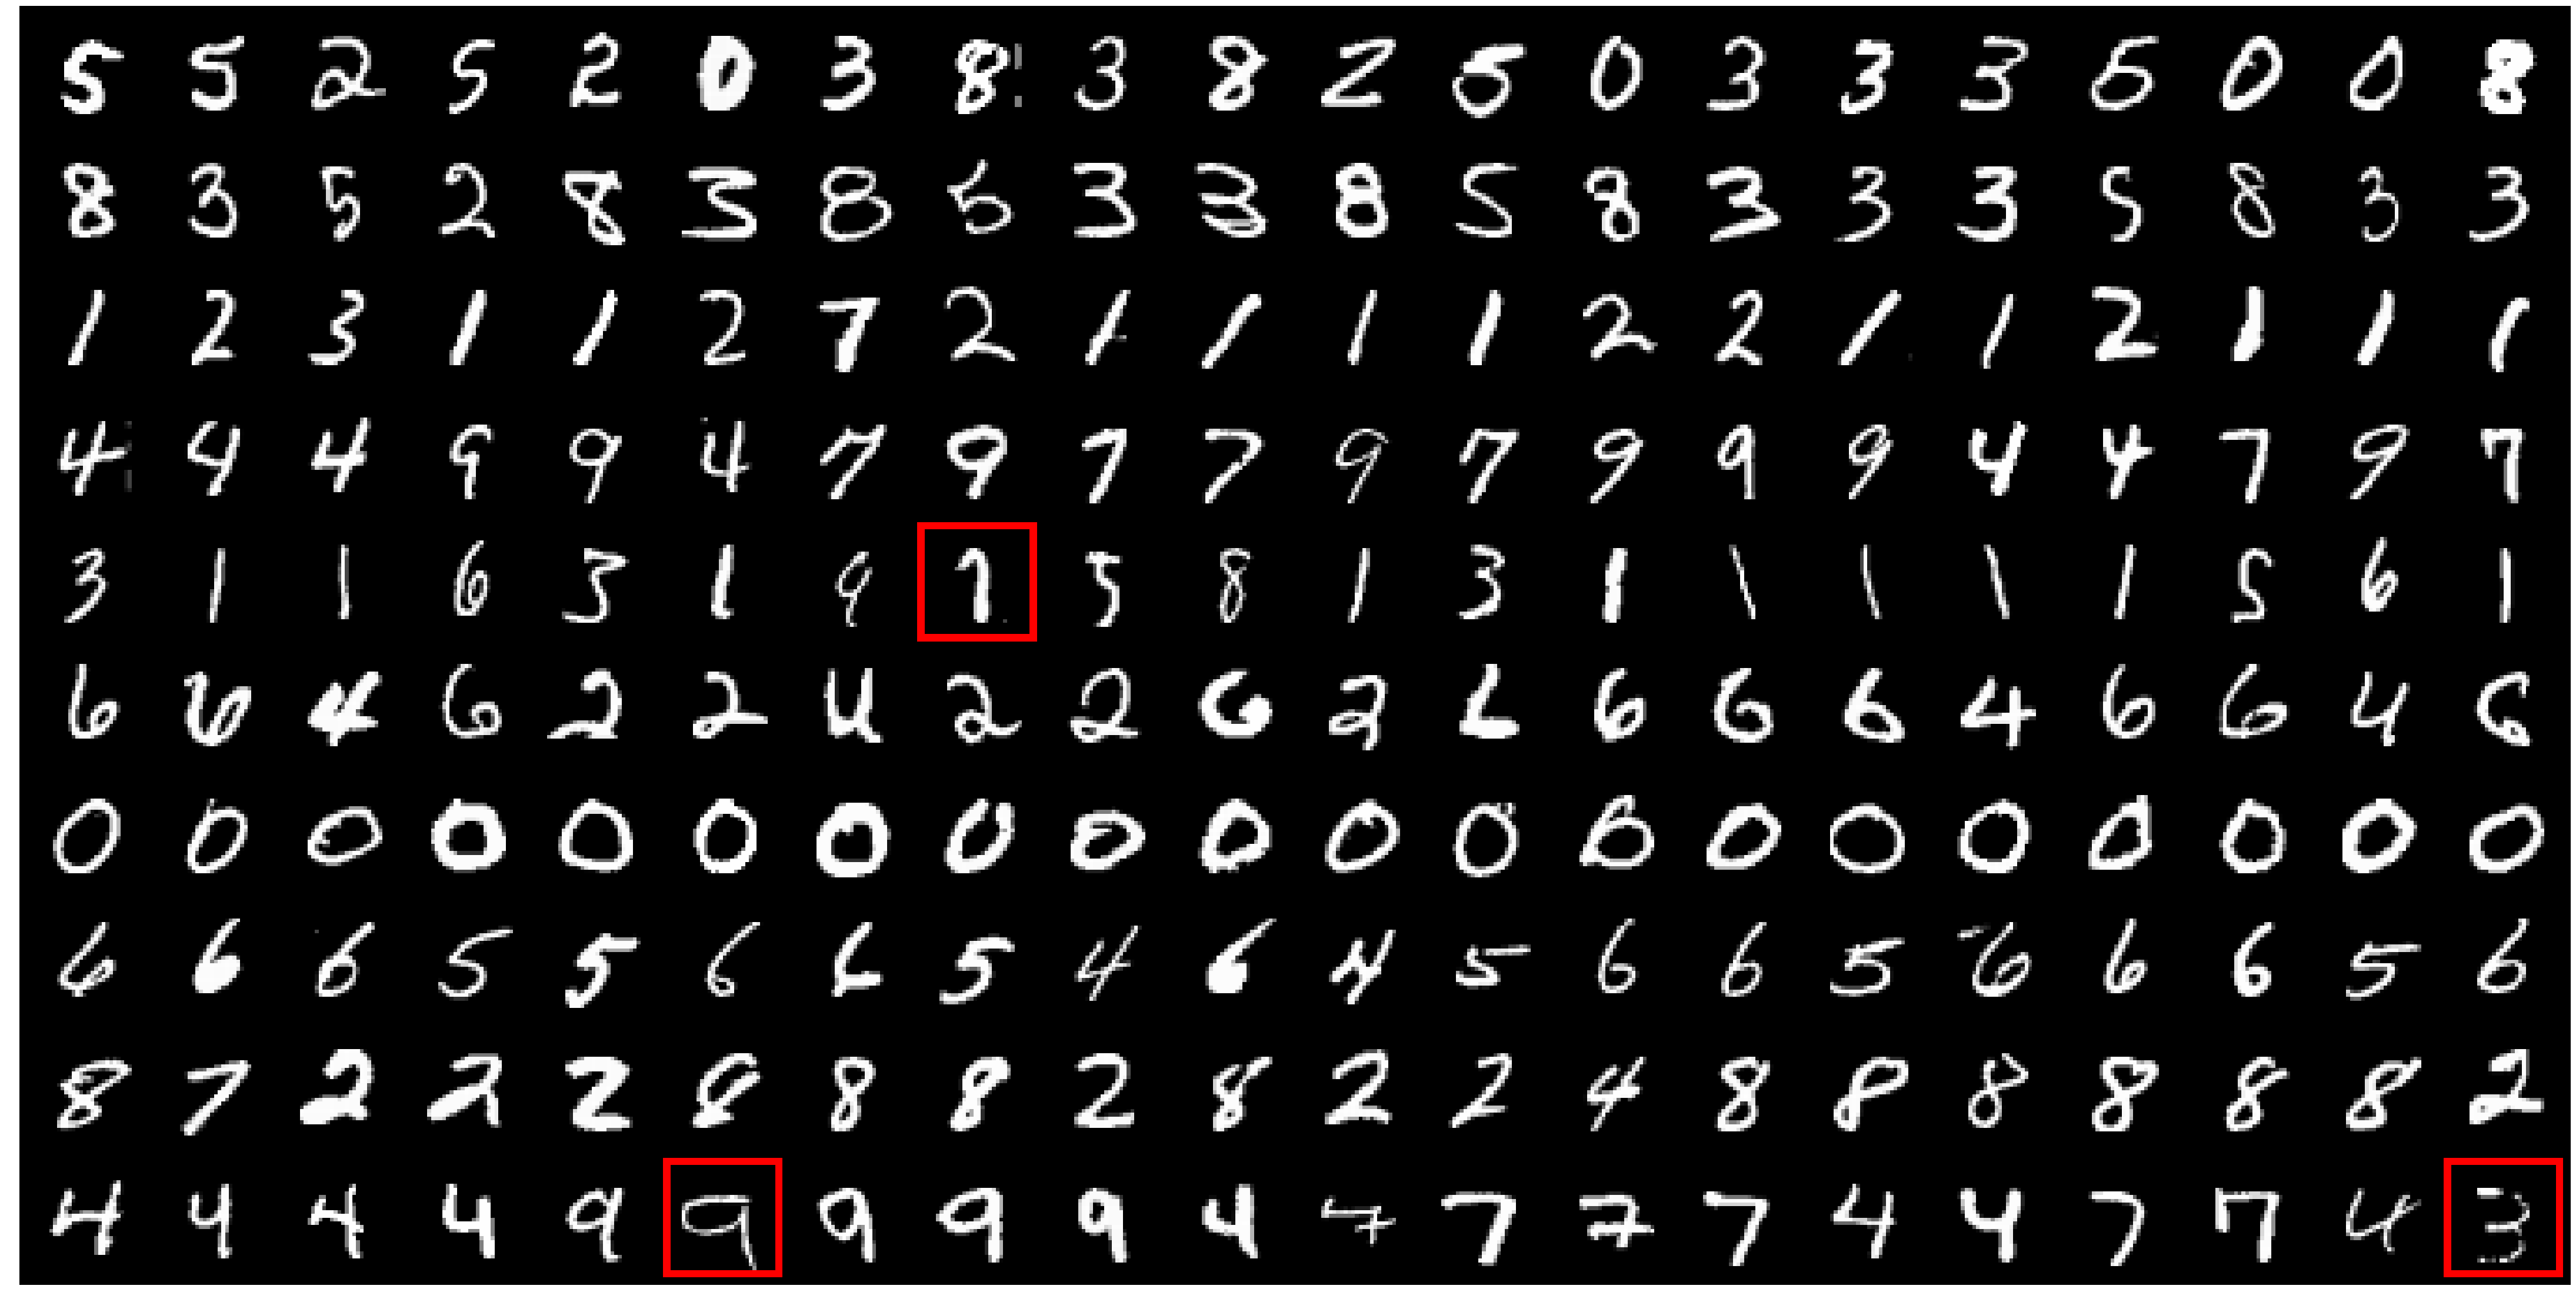

In [136]:
run_name='mlp,nclusters_10,input'
plot_clusters(data, run_name)

# Layer 1

Train loss: 0.0979
Train accuracy: 97.21%

Cluster 0, size: 731
Cluster 0, normC: 0.05145220
Cluster 0, loss: 0.7057
Cluster 0, accuracy: 79.21%

Cluster 1, size: 289
Cluster 1, normC: 0.06724132
Cluster 1, loss: 1.0412
Cluster 1, accuracy: 62.98%

Cluster 2, size: 255
Cluster 2, normC: 0.11452878
Cluster 2, loss: 1.7147
Cluster 2, accuracy: 27.06%

Cluster 3, size: 759
Cluster 3, normC: 0.05450626
Cluster 3, loss: 1.0404
Cluster 3, accuracy: 60.34%

Cluster 4, size: 115
Cluster 4, normC: 0.10465102
Cluster 4, loss: 2.1022
Cluster 4, accuracy: 18.26%

Cluster 5, size: 56905
Cluster 5, normC: 0.00058737
Cluster 5, loss: 0.0358
Cluster 5, accuracy: 99.62%

Cluster 6, size: 297
Cluster 6, normC: 0.08262875
Cluster 6, loss: 1.4355
Cluster 6, accuracy: 46.80%

Cluster 7, size: 302
Cluster 7, normC: 0.09496714
Cluster 7, loss: 1.6937
Cluster 7, accuracy: 35.10%

Cluster 8, size: 163
Cluster 8, normC: 0.14811924
Cluster 8, loss: 1.9894
Cluster 8, accuracy: 18.40%

Cluster 9, size: 184
Cluster

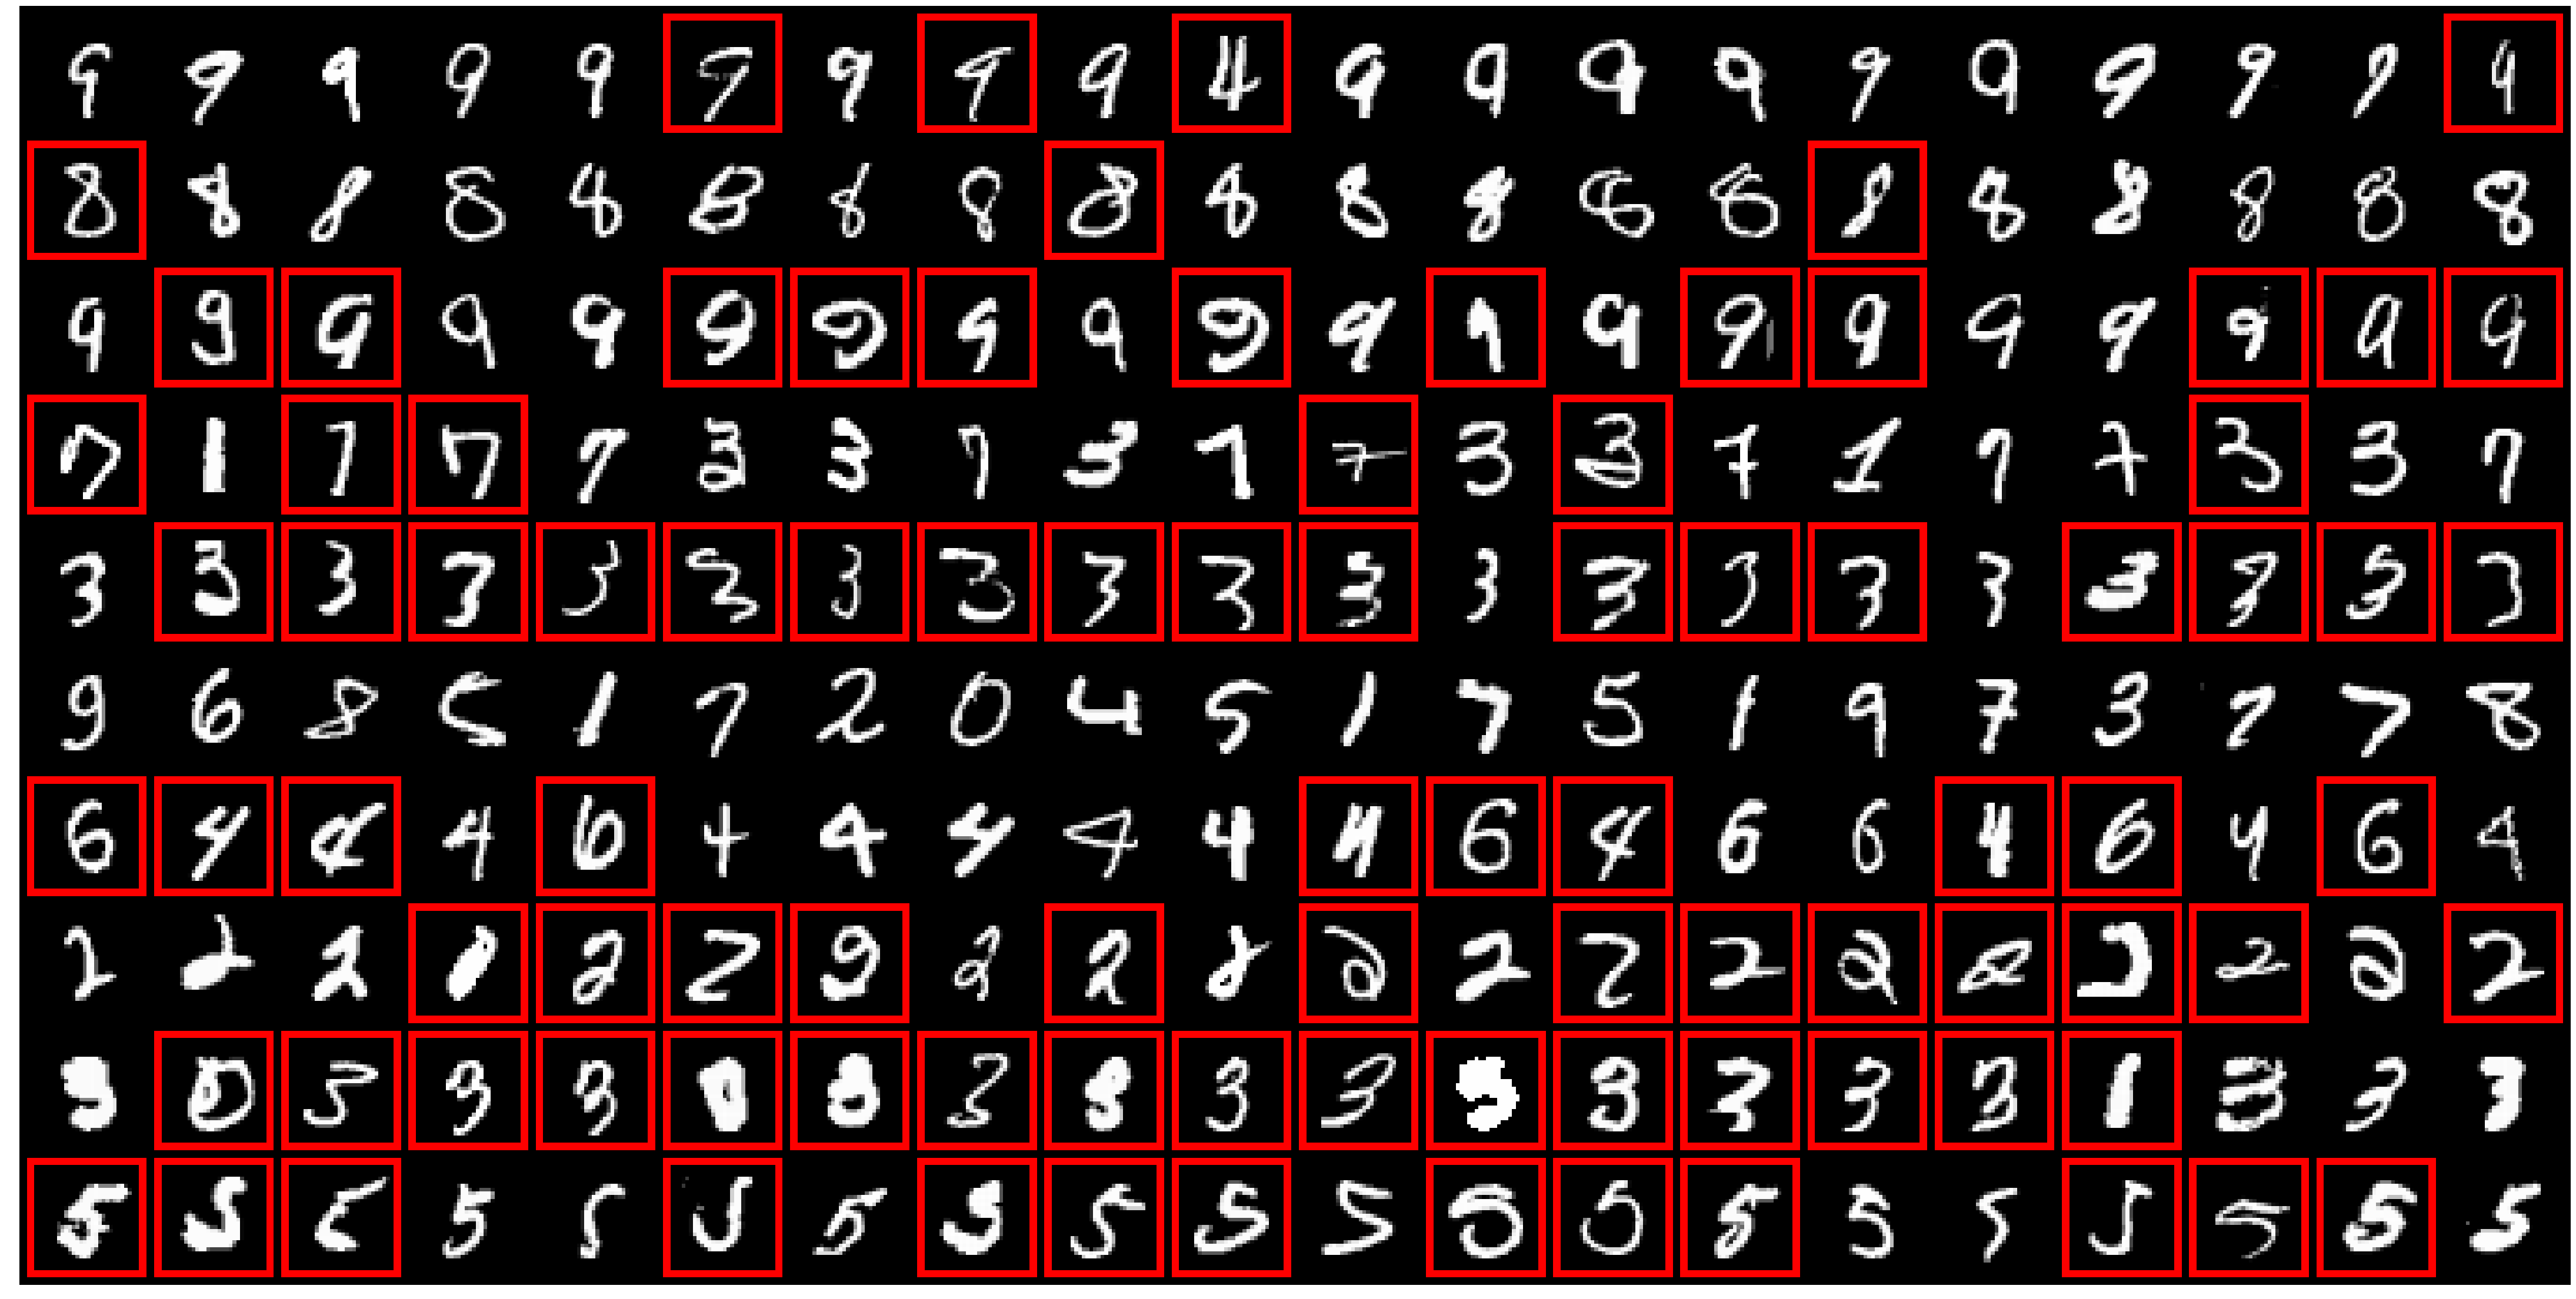

In [132]:
run_name='mlp,nclusters_10,layer_1'
plot_clusters(data, run_name)

# Layer 4 (3)

Train loss: 0.0979
Train accuracy: 97.21%

Cluster 0, size: 662
Cluster 0, normC: 0.06669275
Cluster 0, loss: 1.2480
Cluster 0, accuracy: 51.96%

Cluster 1, size: 269
Cluster 1, normC: 0.06854793
Cluster 1, loss: 1.3699
Cluster 1, accuracy: 42.38%

Cluster 2, size: 575
Cluster 2, normC: 0.07304741
Cluster 2, loss: 1.4231
Cluster 2, accuracy: 42.26%

Cluster 3, size: 261
Cluster 3, normC: 0.06287812
Cluster 3, loss: 1.2218
Cluster 3, accuracy: 58.62%

Cluster 4, size: 346
Cluster 4, normC: 0.05124386
Cluster 4, loss: 1.4720
Cluster 4, accuracy: 44.51%

Cluster 5, size: 547
Cluster 5, normC: 0.05385889
Cluster 5, loss: 1.3016
Cluster 5, accuracy: 54.84%

Cluster 6, size: 341
Cluster 6, normC: 0.05771951
Cluster 6, loss: 1.1823
Cluster 6, accuracy: 60.12%

Cluster 7, size: 451
Cluster 7, normC: 0.04356122
Cluster 7, loss: 0.7570
Cluster 7, accuracy: 76.27%

Cluster 8, size: 2971
Cluster 8, normC: 0.00950770
Cluster 8, loss: 0.2074
Cluster 8, accuracy: 97.78%

Cluster 9, size: 53577
Cluste

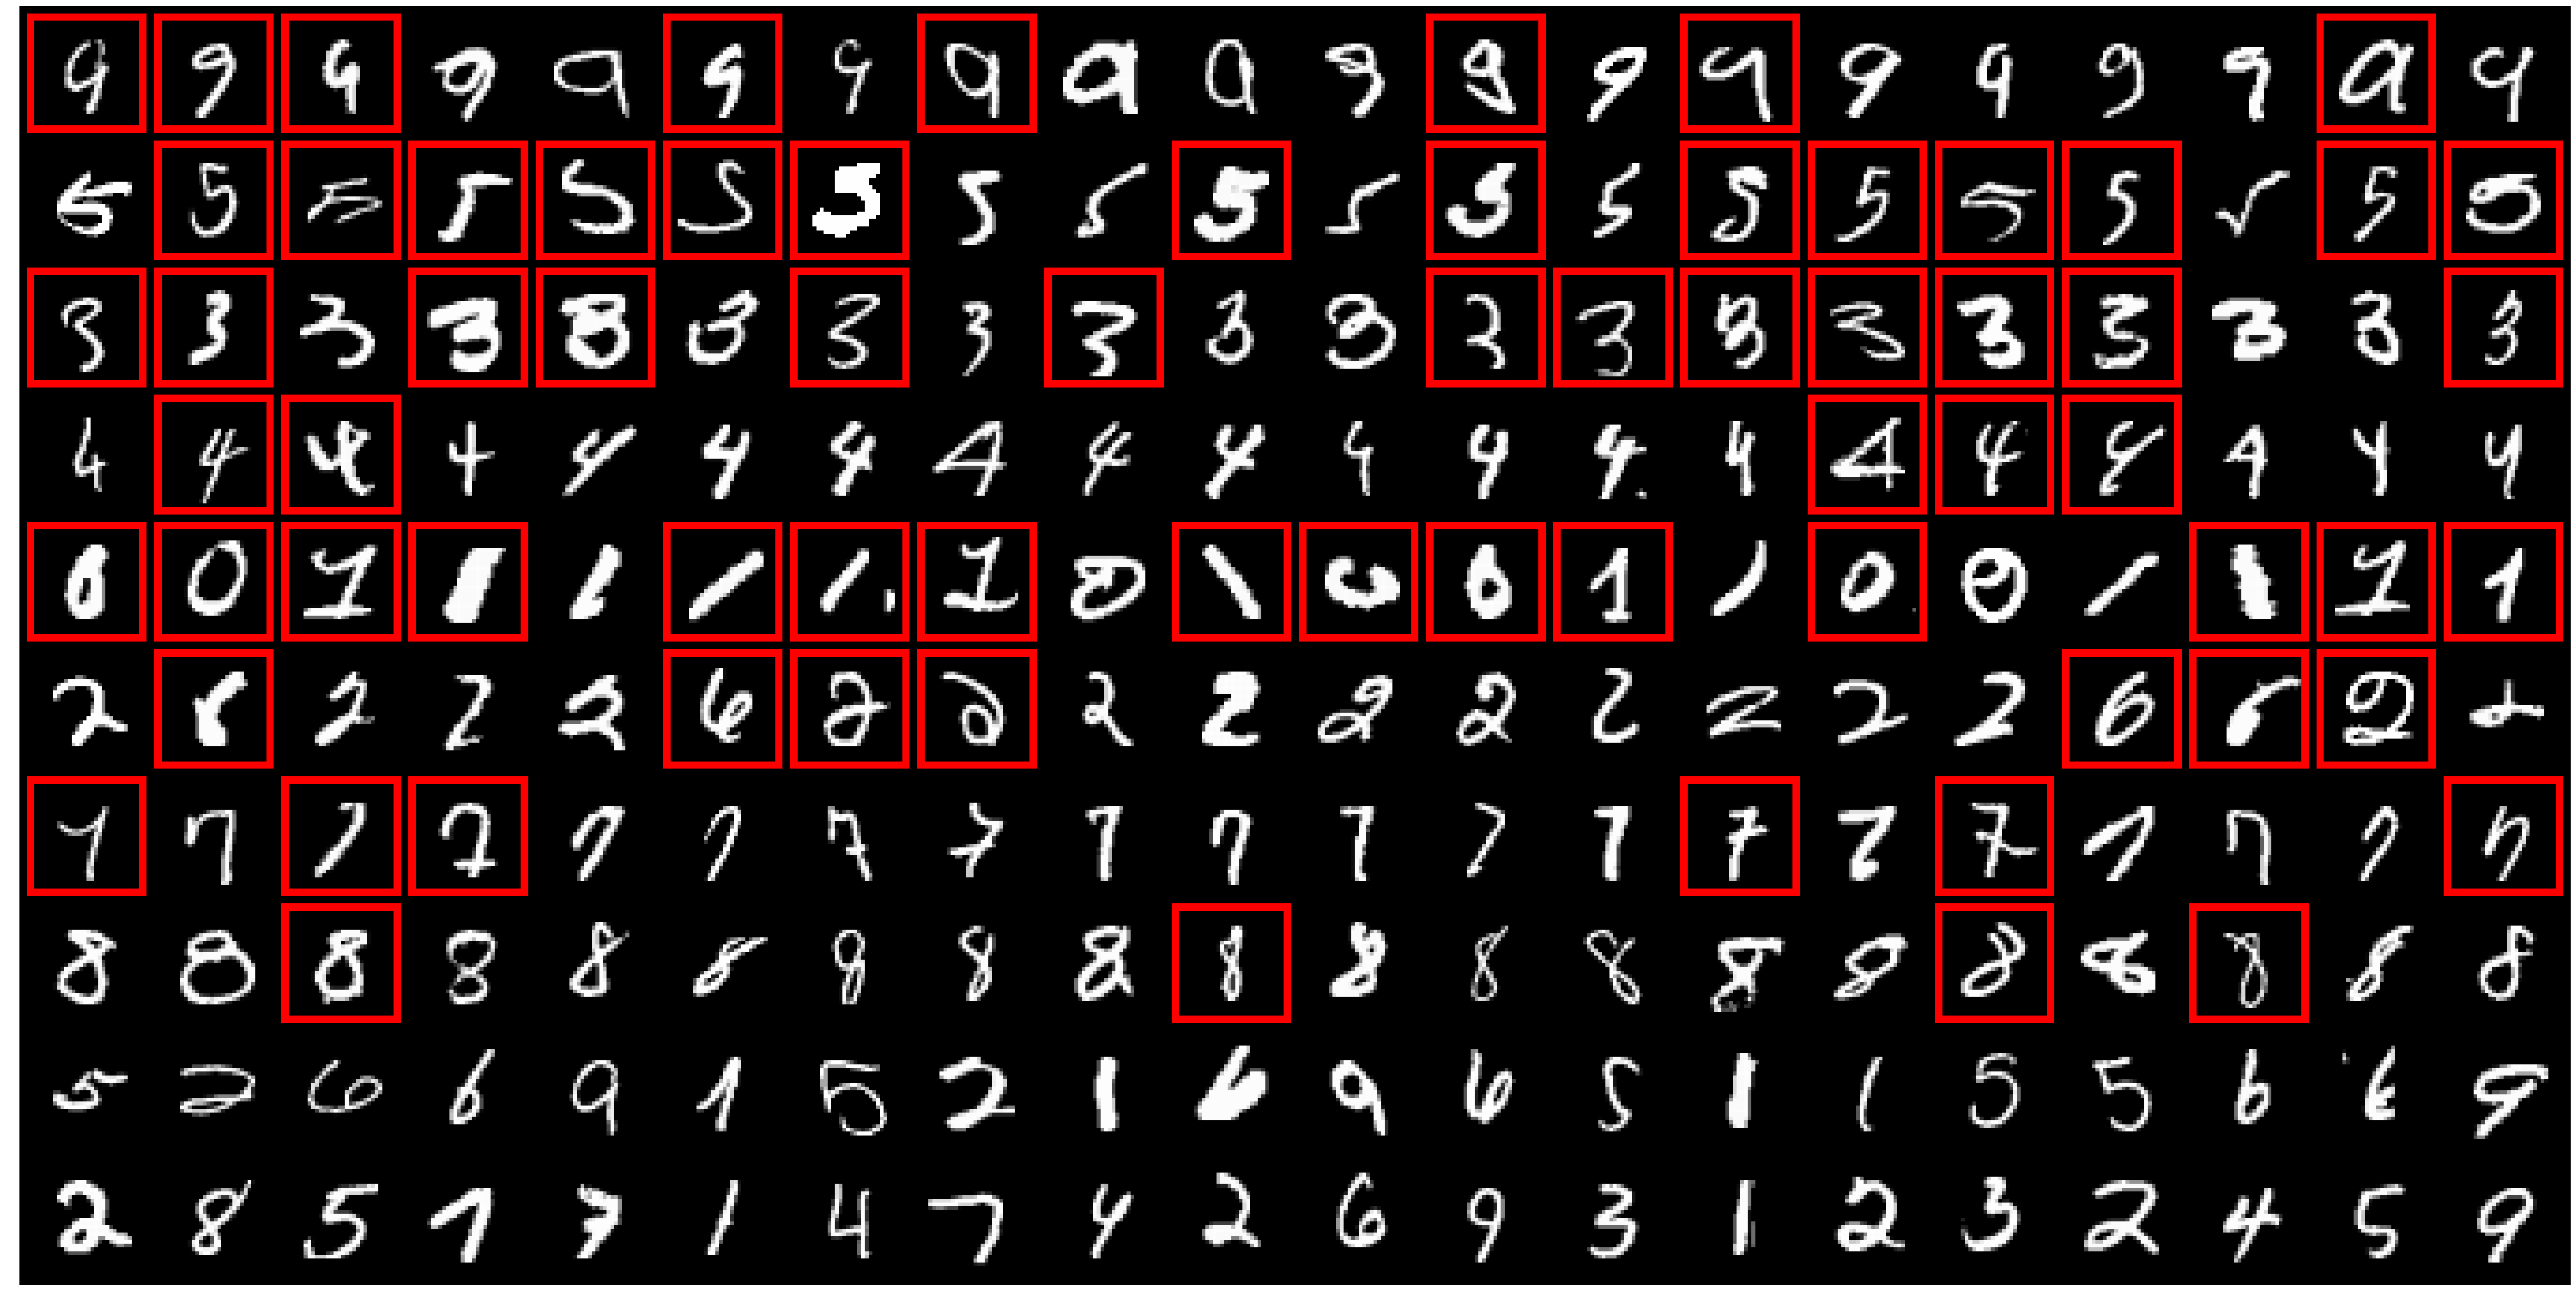

In [137]:
run_name='mlp,nclusters_10,layer_4'
plot_clusters(data, run_name)

* clustering inputs doesn't give interesting clusters with errors but digits go into separate clusters.
* clustering the just one layer gives interesting clusters.